In [110]:
include("./src/VariationalInference.jl")

Main.VariationalInference

In [111]:
# Using Base modules.
using Random
# Load a plotting library.
using Plots
# Load the distributions library.
using Distributions

using StatsPlots

In [112]:
(collect(-5:1:4)) + rand(rng2, Float32, (10, 1))

10×1 Array{Float32,2}:
 -4.479379  
 -3.606977  
 -2.7050116 
 -1.3975967 
 -0.09150255
  0.64425564
  1.5265456 
  2.7749104 
  3.0428572 
  4.3295484 

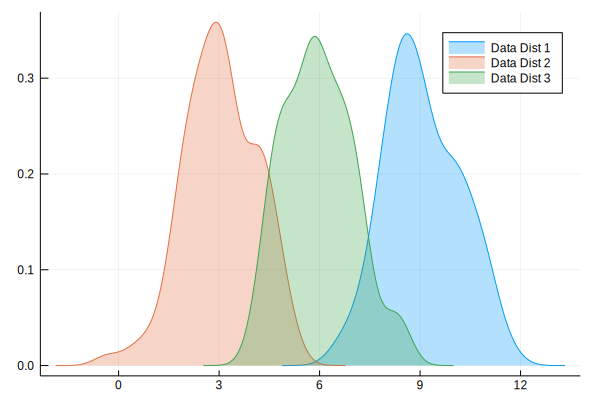

In [113]:
rng1 = RandomDevice()
rng2 = RandomDevice()
num_components = 3
# mu_arr = rand(rng1, -10:0.1:8 , (1,num_components)) + rand(rng2, Float32, (1, num_components))
mu_arr = randperm(rng1, num_components)*3 + rand(rng2, Float32, (num_components))/100
# mu_arr = rand(rng1, -10:2:8 , (1,num_components)) + rand(rng2, Float32, (1, num_components))
# mu_arr = (collect(-50:10:40)) + rand(rng2, Float32, (10, 1))
SAMPLE=105

X = zeros(0)
for i in 1:num_components
    rng = RandomDevice()
    append!(X, randn(rng, Float32, (1, SAMPLE)) .+ mu_arr[i])
end

X = reshape(X, (SAMPLE, num_components))
p=plot()
for i in 1:num_components
    plot!(p, X[((i-1)*SAMPLE+1):i*SAMPLE], seriestype = :density, fill=(0, 0.3), label="Data Dist $i")
end
p

In [114]:
cavi = Main.VariationalInference.UGMM_CAVI(X, num_components, SAMPLE);


Init mean
[11.7754 14.4069 12.0147]

Init s2
Float32[0.057951 0.207053 0.624761]


In [115]:
Main.VariationalInference.get_elbo(cavi)

-19343.80709224181

In [116]:
elbo_values, m_history ,s2_history = Main.VariationalInference.fit(cavi, max_iter=100, tol=1e-5, print_interval=10);

10 Means: [5.52979 2.83682 8.87417] ELBO: -44.533274518739596
20 Means: [5.59232 2.87304 8.90236] ELBO: -48.18442691845223
30 Means: [5.59404 2.87406 8.90311] ELBO: -48.30080552819697
40 Means: [5.59409 2.87409 8.90313] ELBO: -48.30405714464085
ELBO converged with -48.30412807931876 at iteration 44


In [117]:
cavi.m

1×3 Array{Float64,2}:
 5.59409  2.87409  8.90313

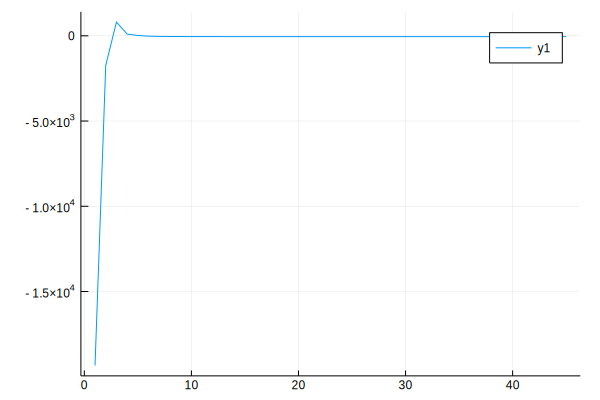

In [118]:
plot(elbo_values)

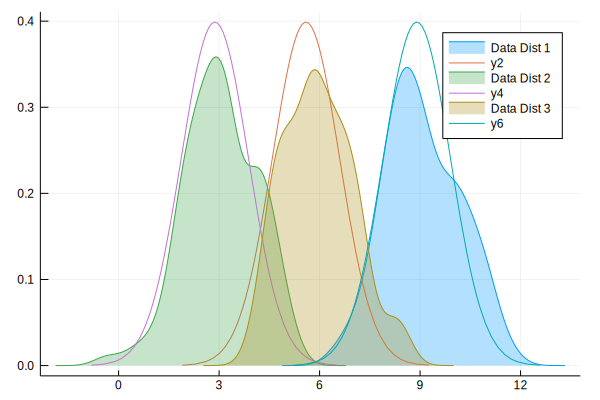

In [119]:
p=plot()
for i in 1:num_components
    plot!(p, X[((i-1)*SAMPLE+1):i*SAMPLE], seriestype = :density, fill=(0, 0.3), label="Data Dist $i")
    plot!(p, Normal(cavi.m[i],1),  fill=0.9)
end
p